# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import os
for dirname,_,filenames in os.walk('train_test_data'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

train_test_data\X_test.csv
train_test_data\X_train.csv
train_test_data\y_test.csv
train_test_data\y_train.csv


# Data Loading

In [2]:
X_train=pd.read_csv('train_test_data/X_train.csv')
X_test=pd.read_csv('train_test_data/X_test.csv')
y_train=pd.read_csv('train_test_data/y_train.csv')
y_test=pd.read_csv('train_test_data/y_test.csv')

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5760, 10) (1440, 10) (5760, 1) (1440, 1)


In [3]:
X_train.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,0.542857,0.278571,0.060000,0.332603,0.563393,0.365562,0.161907,0.200000,0.050818,0.523810
1,0.130077,0.058624,0.137709,0.527484,0.945602,0.382766,0.597620,0.920000,0.012102,0.190476
2,0.292040,0.456816,0.384428,0.320239,0.028487,0.500883,0.176046,0.279084,0.023127,0.142857
3,0.354234,0.421792,0.099236,0.577341,0.571988,0.505632,0.180080,0.480000,0.001926,0.095238
4,0.566797,0.248312,0.160879,0.387883,0.793400,0.524427,0.684196,0.063515,0.029499,0.952381


In [4]:
y_train.head()

,class
0,0
1,1
2,2
3,2
4,3


In [5]:
X_test.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,0.740831,0.108255,0.111055,0.504541,0.574697,0.552189,0.610996,1.000000,0.015602,0.238095
1,0.530736,0.319148,0.158893,0.502829,0.691580,0.567435,0.616682,1.000000,0.025349,0.380952
2,0.087342,0.682097,0.748304,0.419808,0.909292,0.343870,0.381182,0.920000,0.010879,0.047150
3,0.157143,0.357143,0.095000,0.566497,0.502174,0.801828,0.159221,0.400000,0.019150,0.619048
4,0.095257,0.462962,0.067220,0.485957,0.632552,0.565024,0.072943,0.512587,0.072108,0.476190


In [6]:
y_test.head()

,class
0,2
1,3
2,3
3,0
4,1


---

# Algorithm-1 : KNeighborsClassifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knc_model = KNeighborsClassifier(n_neighbors=2)
knc_model = knc_model.fit(X_train.values, y_train.values.ravel())

In [8]:
knc_prediction = knc_model.predict(X_test.values)
print(knc_prediction.tolist())

[2, 3, 3, 0, 1, 2, 0, 3, 1, 0, 2, 3, 3, 2, 3, 3, 3, 2, 3, 1, 0, 1, 1, 3, 3, 1, 2, 1, 1, 3, 0, 0, 2, 2, 0, 1, 0, 3, 1, 1, 1, 1, 3, 2, 2, 0, 3, 1, 0, 1, 1, 1, 2, 2, 0, 3, 1, 3, 1, 3, 3, 2, 3, 0, 0, 0, 3, 0, 3, 0, 1, 2, 3, 2, 1, 1, 0, 2, 2, 2, 3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 1, 3, 2, 3, 3, 3, 1, 2, 2, 1, 0, 3, 1, 2, 0, 1, 3, 3, 0, 2, 2, 0, 3, 2, 0, 3, 2, 3, 2, 0, 1, 2, 1, 0, 3, 1, 0, 2, 3, 2, 1, 3, 2, 2, 3, 3, 0, 1, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3, 1, 1, 1, 1, 3, 3, 1, 1, 0, 1, 1, 1, 0, 2, 3, 1, 0, 3, 1, 2, 2, 0, 1, 2, 3, 1, 1, 2, 1, 2, 1, 2, 1, 3, 2, 1, 3, 0, 2, 1, 1, 3, 3, 3, 0, 2, 2, 0, 3, 0, 3, 2, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 1, 2, 0, 0, 1, 2, 0, 3, 1, 3, 1, 1, 1, 3, 1, 2, 2, 2, 1, 1, 2, 3, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 3, 1, 0, 1, 2, 2, 0, 2, 1, 1, 2, 2, 3, 3, 2, 0, 2, 3, 3, 2, 2, 3, 0, 1, 1, 3, 0, 2, 1, 2, 3, 1, 1, 1, 1, 3, 1, 2, 3, 1, 1, 3, 1, 3, 3, 1, 1, 0, 2, 2, 1, 3, 3, 1, 3, 0, 3, 1, 1, 3, 2, 2, 1, 2, 2, 3, 3, 1, 1, 0, 2, 0, 3, 

In [9]:
y_true = y_test.values.ravel().tolist()
print(y_true)

[2, 3, 3, 0, 1, 2, 0, 3, 1, 0, 2, 3, 1, 2, 3, 3, 3, 2, 3, 0, 1, 1, 1, 3, 3, 1, 2, 1, 1, 3, 0, 0, 2, 2, 1, 0, 0, 3, 1, 1, 1, 1, 0, 2, 2, 2, 3, 1, 0, 1, 1, 0, 2, 2, 0, 0, 1, 3, 1, 3, 3, 2, 3, 0, 0, 0, 3, 0, 3, 3, 1, 2, 3, 2, 1, 0, 0, 2, 2, 2, 3, 3, 3, 2, 3, 0, 0, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 3, 3, 3, 1, 2, 2, 1, 0, 3, 0, 3, 0, 1, 3, 0, 0, 2, 2, 0, 3, 2, 0, 3, 2, 3, 2, 0, 1, 2, 1, 0, 0, 1, 2, 2, 3, 2, 1, 3, 2, 1, 3, 3, 0, 1, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3, 1, 1, 1, 1, 3, 0, 1, 1, 0, 1, 1, 3, 0, 2, 3, 1, 0, 3, 1, 2, 2, 0, 1, 2, 3, 1, 1, 2, 1, 2, 1, 2, 1, 3, 2, 0, 3, 0, 2, 1, 1, 3, 3, 3, 0, 2, 2, 0, 3, 0, 3, 2, 3, 3, 0, 3, 3, 0, 3, 0, 0, 3, 0, 1, 2, 0, 0, 1, 2, 0, 3, 1, 0, 1, 1, 1, 3, 1, 2, 2, 2, 1, 1, 2, 3, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 3, 1, 0, 1, 0, 0, 0, 2, 1, 1, 2, 2, 2, 3, 2, 0, 2, 3, 3, 2, 2, 3, 0, 0, 1, 3, 0, 2, 1, 2, 3, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 3, 1, 3, 3, 1, 1, 0, 0, 0, 0, 3, 3, 1, 3, 0, 3, 1, 1, 3, 2, 0, 1, 0, 2, 3, 3, 1, 1, 0, 2, 0, 3, 

### Result Analysis

In [10]:
class_labels = ['0', '1', '2', '3']

***Accuracy Score***

In [11]:
knc_model_accuracy = accuracy_score(y_true=y_true, y_pred=knc_prediction)
print("Validation accuracy of KNeighborsClassifier model is {:.2f}%".format(knc_model_accuracy*100))

Validation accuracy of KNeighborsClassifier model is 86.18%


***Classification Report***

In [12]:
print(classification_report(y_true=y_true, y_pred=knc_prediction, target_names=class_labels))

              precision    recall  f1-score   support

           0       0.87      0.63      0.73       360
           1       0.80      0.95      0.87       360
           2       0.90      0.94      0.92       360
           3       0.89      0.93      0.91       360

    accuracy                           0.86      1440
   macro avg       0.86      0.86      0.86      1440
weighted avg       0.86      0.86      0.86      1440



***Confusion Matrix***

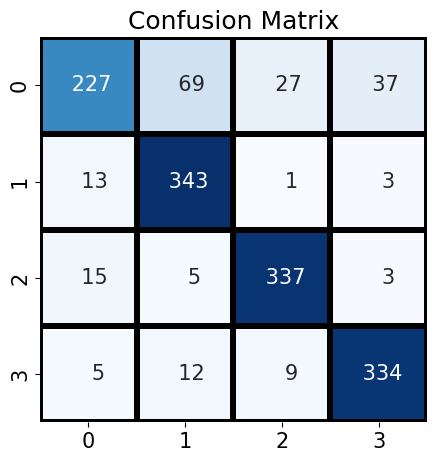

In [13]:
plt.figure(figsize=(5,5))
plt.rcParams['font.size']=15
sns.heatmap(
    data=confusion_matrix(y_true=y_true, y_pred=knc_prediction),
    annot=True,
    cmap=plt.cm.Blues,
    fmt="4d",
    xticklabels=class_labels,
    yticklabels=class_labels,
    cbar=False,
    linewidths=3,
    linecolor='black'
)
plt.title(label="Confusion Matrix")
plt.show()

***Model Saving***

In [14]:
with open(file="models/KNeighborsClassifier_model.pkl", mode="wb") as file:
    pickle.dump(obj=knc_model, file=file)

---

# Algorithm-2 : RandomForestClassifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=500)
rfc_model = rfc_model.fit(X_train.values, y_train.values.ravel())

In [16]:
rfc_prediction = rfc_model.predict(X_test.values)
print(rfc_prediction.tolist())

[2, 3, 0, 0, 1, 2, 0, 3, 1, 0, 2, 3, 1, 2, 3, 3, 3, 2, 3, 1, 1, 1, 1, 3, 3, 1, 2, 1, 1, 3, 0, 0, 2, 2, 0, 1, 0, 3, 0, 1, 1, 1, 2, 2, 2, 0, 3, 1, 0, 1, 1, 2, 2, 2, 0, 3, 1, 3, 1, 3, 3, 2, 3, 0, 0, 0, 3, 0, 3, 3, 1, 2, 3, 2, 1, 0, 0, 2, 2, 1, 3, 3, 3, 2, 3, 1, 0, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 1, 2, 0, 0, 2, 1, 3, 2, 3, 3, 3, 1, 2, 2, 1, 0, 3, 0, 3, 0, 1, 3, 0, 0, 2, 2, 0, 3, 2, 0, 3, 2, 3, 2, 0, 1, 2, 1, 0, 0, 1, 2, 2, 3, 2, 1, 3, 2, 3, 3, 3, 0, 1, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3, 1, 1, 1, 1, 3, 0, 1, 1, 0, 2, 1, 3, 0, 2, 3, 1, 0, 3, 1, 2, 2, 2, 1, 2, 3, 0, 1, 2, 1, 2, 1, 2, 1, 3, 2, 1, 3, 0, 2, 1, 1, 3, 3, 3, 2, 2, 2, 0, 3, 0, 3, 2, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 1, 2, 0, 0, 0, 2, 0, 3, 1, 0, 1, 1, 1, 3, 1, 2, 2, 2, 1, 1, 2, 3, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 3, 1, 0, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 3, 2, 1, 2, 3, 3, 2, 2, 3, 0, 1, 1, 3, 3, 2, 1, 2, 3, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 3, 1, 3, 3, 1, 1, 0, 0, 2, 1, 3, 3, 1, 3, 0, 3, 1, 1, 3, 2, 0, 1, 0, 2, 3, 3, 1, 1, 0, 2, 0, 3, 

In [17]:
y_true = y_test.values.ravel().tolist()
print(y_true)

[2, 3, 3, 0, 1, 2, 0, 3, 1, 0, 2, 3, 1, 2, 3, 3, 3, 2, 3, 0, 1, 1, 1, 3, 3, 1, 2, 1, 1, 3, 0, 0, 2, 2, 1, 0, 0, 3, 1, 1, 1, 1, 0, 2, 2, 2, 3, 1, 0, 1, 1, 0, 2, 2, 0, 0, 1, 3, 1, 3, 3, 2, 3, 0, 0, 0, 3, 0, 3, 3, 1, 2, 3, 2, 1, 0, 0, 2, 2, 2, 3, 3, 3, 2, 3, 0, 0, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 3, 3, 3, 1, 2, 2, 1, 0, 3, 0, 3, 0, 1, 3, 0, 0, 2, 2, 0, 3, 2, 0, 3, 2, 3, 2, 0, 1, 2, 1, 0, 0, 1, 2, 2, 3, 2, 1, 3, 2, 1, 3, 3, 0, 1, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3, 1, 1, 1, 1, 3, 0, 1, 1, 0, 1, 1, 3, 0, 2, 3, 1, 0, 3, 1, 2, 2, 0, 1, 2, 3, 1, 1, 2, 1, 2, 1, 2, 1, 3, 2, 0, 3, 0, 2, 1, 1, 3, 3, 3, 0, 2, 2, 0, 3, 0, 3, 2, 3, 3, 0, 3, 3, 0, 3, 0, 0, 3, 0, 1, 2, 0, 0, 1, 2, 0, 3, 1, 0, 1, 1, 1, 3, 1, 2, 2, 2, 1, 1, 2, 3, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 3, 1, 0, 1, 0, 0, 0, 2, 1, 1, 2, 2, 2, 3, 2, 0, 2, 3, 3, 2, 2, 3, 0, 0, 1, 3, 0, 2, 1, 2, 3, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0, 3, 1, 3, 3, 1, 1, 0, 0, 0, 0, 3, 3, 1, 3, 0, 3, 1, 1, 3, 2, 0, 1, 0, 2, 3, 3, 1, 1, 0, 2, 0, 3, 

### Result Analysis

In [18]:
class_labels = ['0', '1', '2', '3']

***Accuracy Score***

In [19]:
rfc_model_accuracy=accuracy_score(y_true=y_true,y_pred=rfc_prediction)
print("Validation accuracy of RandomForestClassifier model is {:.2f}%".format(rfc_model_accuracy*100))

Validation accuracy of RandomForestClassifier model is 92.50%


***Classification Report***

In [20]:
print(classification_report(y_true=y_true,y_pred=rfc_prediction, target_names=class_labels))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       360
           1       0.91      0.96      0.93       360
           2       0.91      0.97      0.94       360
           3       0.94      0.99      0.96       360

    accuracy                           0.93      1440
   macro avg       0.93      0.93      0.92      1440
weighted avg       0.93      0.93      0.92      1440



***Confusion Matrix***

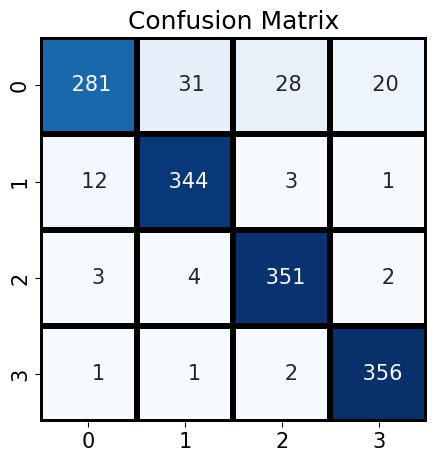

In [21]:
plt.figure(figsize=(5,5))
plt.rcParams['font.size']=15
sns.heatmap(
    data=confusion_matrix(y_true=y_true,y_pred=rfc_prediction),
    annot=True,
    cmap=plt.cm.Blues,
    fmt="4d",
    xticklabels=class_labels,
    yticklabels=class_labels,
    cbar=False,
    linewidths=3,
    linecolor='black'
)
plt.title(label="Confusion Matrix")
plt.show()

***Model Saving***

In [22]:
with open(file="models/RandomForestClassifier_model.pkl", mode="wb") as file:
    pickle.dump(obj=rfc_model, file=file)

---

# Accuracy Comparision

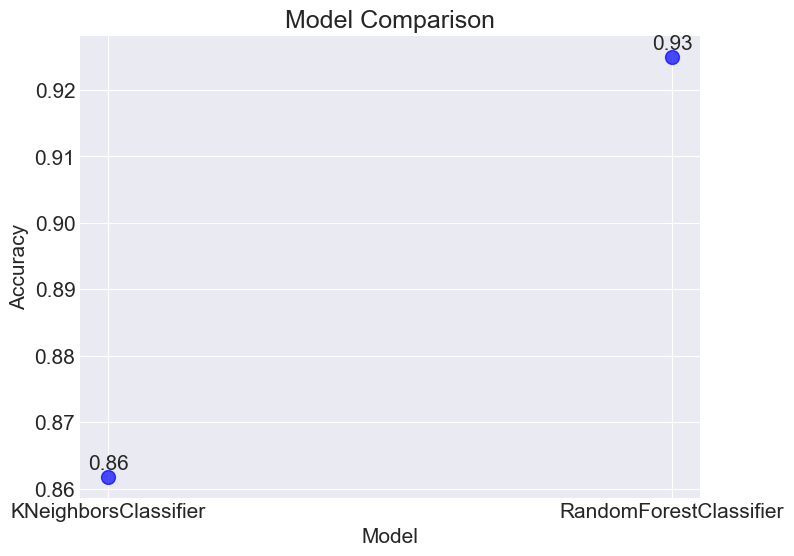

In [23]:
chart_data = [knc_model_accuracy, rfc_model_accuracy]
chart_labels = ['KNeighborsClassifier', 'RandomForestClassifier']
with plt.style.context(style="seaborn-darkgrid"):
    plt.figure(figsize=(8, 6))
    plt.scatter(chart_labels, chart_data, color='blue', s=100, alpha=0.7)
    plt.title('Model Comparison')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    for label, data in zip(chart_labels, chart_data):
        plt.annotate(f'{data:.2f}', (label, data), textcoords="offset points", xytext=(0, 5), ha='center')
    plt.show()